# Homework 3 Solutions

# Problem 1

#### Twelve triaxial tests on cylindrical plugs of Berea sandstone are reported below (Bernabe and Brace, 1990):

##### a) Plot all data points in a $\sigma_1$ VS $\sigma_3$ plot and draw respective Mohr Circles (in Matlab, Python or Excel).

$\sigma_3$ (the effective minimum principal stress) is calculated using

$$\sigma_3=P_c-P_p$$

$\sigma_1$ (the effective maximum principal stress) is calculated using

$$\sigma_1=\sigma_3+\sigma_d$$

Where $P_c$ is the confining pressure, $P_p$ is the pore pressure, and $\sigma_d$ is the deviatoric stress at failure

Note deviatoric stress is the axial stress that a load cell inside the pressure vessel measures ($S_1-S_3$). For example, the value would be zero for hydrostatic loading (since $S_1=S_3$, $S_1-S_3=0$) even though axial stress measured with the load frame is not zero $S_1\neq0$.

In [9]:
import pandas as pd

excel_file = 'HW_3.xlsx'
DataQ1 = pd.read_excel(excel_file, sheet_name=0)
DataQ1.head(12)

,Confining Pressure [MPa],Pore Pressure [MPa],Peak Deviatoric Stress [MPa],Sigma_3 [MPa],Sigma_1 [MPa]
0,10,0,116,10,126
1,50,0,227,50,277
2,20,8,119,12,131
3,45,8,183,37,220
4,60,8,206,52,258
5,75,8,228,67,295
6,50,37,120,13,133
7,50,32,141,18,159
8,90,64,161,26,187
9,90,55,187,35,222


The simple linear regression fit is:
y=3.200073x+100.080890


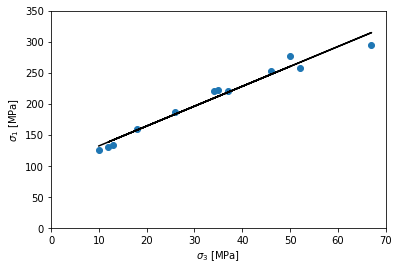

In [10]:
import numpy as np
import matplotlib.pyplot as plt

Pc = DataQ1['Confining Pressure [MPa]']
Pp = DataQ1['Pore Pressure [MPa]']
sigma_d = DataQ1['Peak Deviatoric Stress [MPa]']
sigma_3 = DataQ1['Sigma_3 [MPa]']
sigma_1 = DataQ1['Sigma_1 [MPa]']

# plot data
plt.scatter(sigma_3,sigma_1)
# calculate the simple linear regression fit
coefficients = np.polyfit(sigma_3, sigma_1, 1)
yy = np.poly1d(coefficients)
# plot trendline
plt.plot(sigma_3,yy(sigma_3),"-k")
# print trendline
print ('The simple linear regression fit is:')
print ("y=%.6fx+%.6f"%(coefficients[0],coefficients[1]))
# plot labels
plt.xlabel('$\sigma_3$ [MPa]')
plt.ylabel('$\sigma_1$ [MPa]')
# axis range
plt.xlim([0, 70])
plt.ylim([0, 350])
plt.show()

Coulomb's failure criterion can be written as

$$\sigma_1 = UCS + q \; \sigma_3$$

Where $\sigma_1$ is the effective maximum principal stress at failure, $\sigma_3$ is the effective minimum principal stress and $q$ is the friction parameter function of the friction angle (warning: this is not the same $q$ from the $p'-q$ or $\sigma_m-q$ space)

From the above plot, the slope of the linear regression fit through $\sigma_1$ VS $\sigma_3$ is $q=3.2$. The intercept is $UCS=100 [MPa]$.

So, Coulomb's failure criterion can be written as

$$\sigma_1 = 100 + 3.2 \; \sigma_3$$

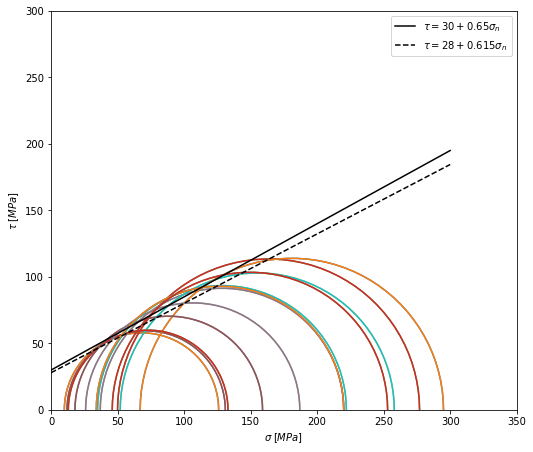

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Function for Mohr's Circle
# Code adapted from John D'Angelo
def plotMohr3D(sig3,sig2,sig1):

    circle1X=[]
    circle1Y=[]
    circle2X=[]
    circle2Y=[]
    circle3X=[]
    circle3Y=[]
    
    for i in np.linspace(0,np.pi):
        circle1X.append((sig2-sig3)/2*np.cos(i) + (sig3+(sig2-sig3)/2))
        circle2X.append((sig1-sig2)/2*np.cos(i) + (sig2+(sig1-sig2)/2))
        circle3X.append((sig1-sig3)/2*np.cos(i) + (sig3+(sig1-sig3)/2))
        circle1Y.append((sig2-sig3)/2*np.sin(i) )
        circle2Y.append((sig1-sig2)/2*np.sin(i) )
        circle3Y.append((sig1-sig3)/2*np.sin(i) )
    plt.plot(circle2X,circle2Y)
    # plot labels
    plt.xlabel(r'$\sigma \; [MPa]$')
    plt.ylabel(r'$\tau \; [MPa]$')
    # plot layout
    plt.axis('square')
    plt.tight_layout()
    # axis range
    plt.xlim([0, 350])
    plt.ylim([0, 300])
    
# Plot 2d Mohr Circles
for i in range(0,len(sigma_1)):
    plotMohr3D(0,sigma_3[i],sigma_1[i])
    plotMohr3D(0,sigma_3[i],sigma_1[i])
    
# Plot shear failure envelope 1
mu = 0.65 #friction coefficient
plt.plot([0,300],[30, 300 * mu],'k-',label=r'$\tau = 30 + 0.65 \sigma_n$')

# Plot shear failure envelope 2
mu = 0.615 #friction coefficient
plt.plot([0,300],[28, 300 * mu],'k--',label=r'$\tau = 28 + 0.615 \sigma_n$')

# Change plot size
fig = plt.gcf()
fig.set_size_inches(7, 7)

# Plot legend
plt.legend()

##### b) Fit the data to Mohr-Coulomb criterion to compute unconfined compressive strength UCS and the parameter q through a linear regression. Then, calculate the cohesive strength $S_0$ and internal friction coefficient $\mu_i$

From part a) the Coulomb's failure criterion was

$$\sigma_1 = UCS + q \; \sigma_3$$
<br>
$$\sigma_1 = 100 + 3.2 \; \sigma_3$$

Where $\sigma_1$ is the effective maximum principal stress at failure, $\sigma_3$ is the effective minimum principal stress and $q$ is the friction parameter function of the friction angle (warning: this is not the same $q$ from the $p'-q$ or $\sigma_m-q$ space)

Coulomb failure criterion can also be written as:

$$ \tau = S_0 + \mu_i \sigma_n$$

Where the maximum shear stress $\tau$ will be a function of the rock cohesive strength $S_0$, the internal friction coefficient $\mu_i$, and the applied normal effective compressive stress $\sigma_n$

$q$ (friction parameter function of the friction angle) is related to $\varphi$ (friction angle) through the equation

$$q=\frac{1+sin\varphi}{1-sin\varphi}$$
<br>
$$3.2=\frac{1+sin\varphi}{1-sin\varphi}$$
<br>
$$\varphi=31^{\circ}$$

UCS is a function of $S_0$ (rock cohesive strength) and $\varphi$ (friction angle)

$$ UCS = 2 S_0 \sqrt{\frac{1 + \sin \varphi}{1 - \sin \varphi}}$$
<br>
$$ 100 = 2 S_0 \sqrt{3.2}$$
<br>
$$S_0=28 [MPa]$$

$q$ (friction parameter function of the friction angle) is related to $\mu_i$ (internal friction coefficient) through the equation

$$q=(\sqrt{\mu_i^2+1}+\mu_i)^2$$
<br>
$$\mu_i=\frac{q-1}{2\sqrt{q}}=\frac{3.2-1}{2\sqrt{3.2}}=0.615$$

So, in summary

$$ \tau = S_0 + \mu_i \sigma_n$$
<br>
$$ \tau = 28 + 0.615 \sigma_n$$

From the Mohr Circles plot, a $\mu_i$ (internal friction coefficient) of 0.65 and $S_0$ (rock cohesive strength) of 30 seems to give a better fit.

##### c) Based on this information, compute the failure angle of the shear fracture you would expect to see in this sample after failure. Draw a sketch indicating the orientation with respect to the axial and radial stress.

The failure angle is

$$\alpha=45^{\circ}+\frac{\varphi}{2}=60.8^{\circ}$$

![](files/HW3_Q1a.jpg)

##### d) Did pore pressure significantly change the effective stress failure criterion?

Rock strength and shear failure depends on effective stress, so pore pressure doesn’t change effective stress failure line in the effective stress space.

# Problem 2

#### The file “Triaxial-1500psi-raw.xlsx” in the ‘Homework’ folder contains data from a triaxial test performed on a sandstone in dry conditions, $P_p=0 \; psi$. $P_c=1500 \; psi$ is the confining pressure, SigD is the deviatoric stress ($S_1-S_3$), Ex is the axial strain, and Ey is the radial strain.

In [12]:
import pandas as pd
excel_file = 'HW_3.xlsx'
DataQ2 = pd.read_excel(excel_file, sheet_name=1)
DataQ2.head(2427)

,Time [s],SigD [psi],"Axial Strain, Ex","Radial Strain, Ey","Volumetric Strain, Evol"
0,924.3000,12.313760,0.001796,0.002105,0.006005
1,925.3000,13.134120,0.001795,0.002106,0.006006
2,926.3000,12.071360,0.001796,0.002106,0.006008
3,927.3000,11.906290,0.001796,0.002107,0.006010
4,928.3000,11.021060,0.001797,0.002108,0.006013
5,929.3000,9.342437,0.001797,0.002108,0.006014
6,930.3000,10.996250,0.001796,0.002109,0.006014
7,931.3000,13.646980,0.001796,0.002110,0.006016
8,932.3000,10.222380,0.001797,0.002111,0.006019
9,933.3000,11.427650,0.001797,0.002112,0.006020


##### a) Plot deviatoric stress and strains as a function of time (two plots). Mechanical experiments are usually performed at constant strain rate or constant stress rate. Which case is this? What is the rate?

The axial strain vs time plot shows that the experiment is constant strain rate loading. The loading strain rate is equal to $4\times10^{-6} (\frac{1}{s})$

Linear regression fit through axial strain vs time data gives
y=0.000004x+-0.002474
The slope is the loading rate


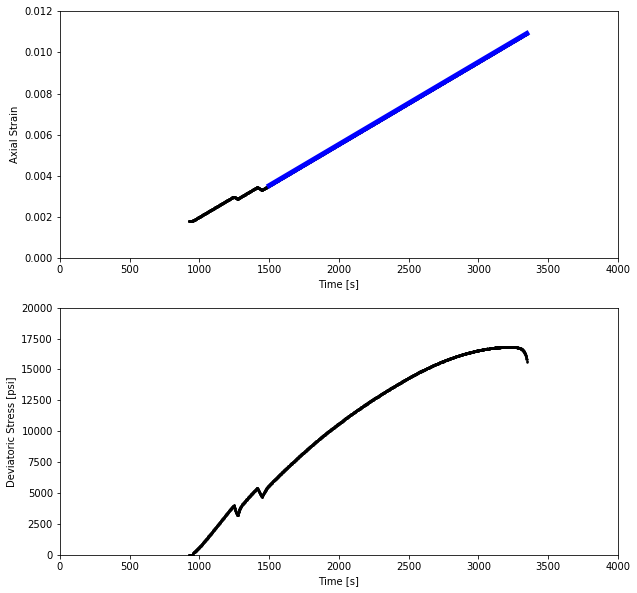

In [13]:
import numpy as np
import matplotlib.pyplot as plt

Time = DataQ2['Time [s]']
SigD = DataQ2['SigD [psi]']
Eaxial = DataQ2['Axial Strain, Ex']
Eradial = DataQ2['Radial Strain, Ey']
Evol = DataQ2['Volumetric Strain, Evol']

# Axial strain vs time
plt.subplot(2, 1, 1)
plt.scatter(Time,Eaxial,color="k",s=2)
# plot labels
plt.xlabel('Time [s]')
plt.ylabel('Axial Strain')
# axis range
plt.xlim([0, 4000])
plt.ylim([0, 0.012])

# Segment of the data set for calculating loading strain rate
Time1 = Time.iloc[580:2427]
Eaxial1 = Eaxial.iloc[580:2427]
# Calculate the simple linear regression fit to find loading strain rate
coefficients = np.polyfit(Time1, Eaxial1, 1)
yy = np.poly1d(coefficients)
# plot trendline
plt.plot(Time1,yy(Time1),"-b",linewidth=5)
# print trendline
print ("Linear regression fit through axial strain vs time data gives")
print ("y=%.6fx+%.6f"%(coefficients[0],coefficients[1]))
print ("The slope is the loading rate")

# Deviatoric stress vs time
plt.subplot(2, 1, 2)
plt.scatter(Time,SigD,color="k",s=2)
# plot labels
plt.xlabel('Time [s]')
plt.ylabel('Deviatoric Stress [psi]')
# axis range
plt.xlim([0, 4000])
plt.ylim([0, 20000])

# Change plot size
fig = plt.gcf()
fig.set_size_inches(10, 10)

##### b) Plot deviatoric stress as a function of axial strain. Compute loading Young modulus at 25% of peak stress and the unloading Young moduli for the two unloading cycles. Comment on the difference.

Loading Young's modulus at 25% of peak stress is 3270 [Mpsi]
<br>
Loading Young's modulus at 50% of max strain is 2180 [Mpsi]
<br>
Unloading Young's modulus for the first cyle is 7560 [Mpsi]
<br>
Unloading Young's modulus for the second cyle is 5340 [Mpsi]

Linear regression fit through the loading phase at 25% of peak stress gives
y=3274902.890458x+-5829.303546
The slope is the Young's modulus
Linear regression fit through the loading phase at 50% of max strain gives
y=2183282.780543x+-1492.591370
Linear regression fit through the first unloading phase gives
y=7560143.023729x+-18713.050167
Linear regression fit through the second unloading phase gives
y=5338099.301622x+-13037.001663


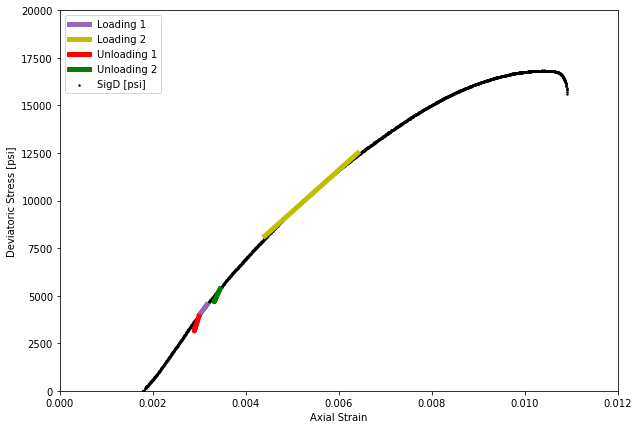

In [14]:
import numpy as np
import matplotlib.pyplot as plt

Time = DataQ2['Time [s]']
SigD = DataQ2['SigD [psi]']
Eaxial = DataQ2['Axial Strain, Ex']
Eradial = DataQ2['Radial Strain, Ey']
Evol = DataQ2['Volumetric Strain, Evol']

# Deviatoric stress vs axial strain
plt.scatter(Eaxial,SigD,color="k",s=2)
# plot labels
plt.xlabel('Axial Strain')
plt.ylabel('Deviatoric Stress [psi]')
# axis range
plt.xlim([0, 0.012])
plt.ylim([0, 20000])

# Segment of the data set for calculating loading Young's modulus at 25% of peak stress (~16800 psi)
Eaxial_load1 = Eaxial.iloc[380:420]
SigD_load1 = SigD.iloc[380:420]
# Calculate the simple linear regression fit to find loading Young's modulus at 25% of peak stress
coefficients = np.polyfit(Eaxial_load1, SigD_load1, 1)
yy = np.poly1d(coefficients)
# plot trendline
plt.plot(Eaxial_load1,yy(Eaxial_load1),"tab:purple",label='Loading 1',linewidth=5)
# print trendline
print ("Linear regression fit through the loading phase at 25% of peak stress gives")
print ("y=%.6fx+%.6f"%(coefficients[0],coefficients[1]))
print ("The slope is the Young's modulus")

# Segment of the data set for calculating loading Young's modulus at 50% of max strain
Eaxial_load2 = Eaxial.iloc[800:1300]
SigD_load2 = SigD.iloc[800:1300]
# Calculate the simple linear regression fit to find loading Young's modulus at 50% of max strain
coefficients = np.polyfit(Eaxial_load2, SigD_load2, 1)
yy = np.poly1d(coefficients)
# plot trendline
plt.plot(Eaxial_load2,yy(Eaxial_load2),"-y",label='Loading 2',linewidth=5)
# print trendline
print ("Linear regression fit through the loading phase at 50% of max strain gives")
print ("y=%.6fx+%.6f"%(coefficients[0],coefficients[1]))

# Segment of the data set for calculating first unloading Young's modulus
Eaxial_unload1 = Eaxial.iloc[326:354]
SigD_unload1 = SigD.iloc[326:354]
# Calculate the simple linear regression fit to find first unloading Young's modulus
coefficients = np.polyfit(Eaxial_unload1, SigD_unload1, 1)
yy = np.poly1d(coefficients)
# plot trendline
plt.plot(Eaxial_unload1,yy(Eaxial_unload1),"-r",label='Unloading 1',linewidth=5)
# print trendline
print ("Linear regression fit through the first unloading phase gives")
print ("y=%.6fx+%.6f"%(coefficients[0],coefficients[1]))

# Segment of the data set for calculating second unloading Young's modulus
Eaxial_unload2 = Eaxial.iloc[495:529]
SigD_unload2 = SigD.iloc[495:529]
# Calculate the simple linear regression fit to find second unloading Young's modulus
coefficients = np.polyfit(Eaxial_unload2, SigD_unload2, 1)
yy = np.poly1d(coefficients)
# plot trendline
plt.plot(Eaxial_unload2,yy(Eaxial_unload2),"-g",label='Unloading 2',linewidth=5)
# print trendline
print ("Linear regression fit through the second unloading phase gives")
print ("y=%.6fx+%.6f"%(coefficients[0],coefficients[1]))

# Change plot size
fig = plt.gcf()
fig.set_size_inches(10, 7)
# Legend
plt.legend()

##### c) Plot radial strain VS axial strain and compute loading Poisson ratio.

Poisson's ratio:

$$\frac{\epsilon_r}{\epsilon_a}=-v=-0.371$$

Linear regression fit through the portion of the data used to calculate Poisson's ratio gives
y=-0.329833x+0.002966
The slope is the Poisson's ratio


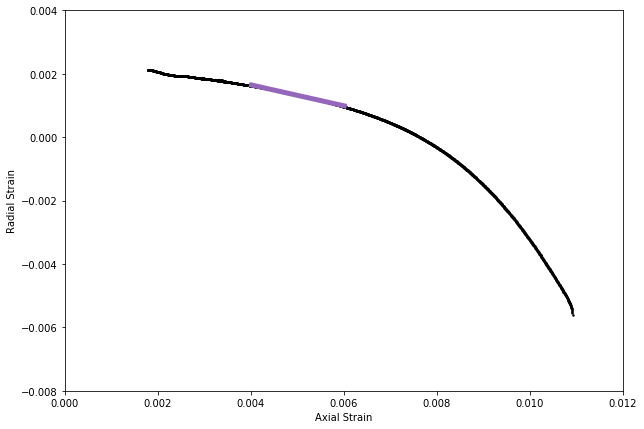

In [15]:
import numpy as np
import matplotlib.pyplot as plt

Time = DataQ2['Time [s]']
SigD = DataQ2['SigD [psi]']
Eaxial = DataQ2['Axial Strain, Ex']
Eradial = DataQ2['Radial Strain, Ey']
Evol = DataQ2['Volumetric Strain, Evol']

# Radial strain vs axial strain
plt.scatter(Eaxial,Eradial,color="k",s=2)
# plot labels
plt.xlabel('Axial Strain')
plt.ylabel('Radial Strain')
# axis range
plt.xlim([0, 0.012])
plt.ylim([-0.008, 0.004])

# Segment of the data set for calculating Poisson's ratio
Eaxial_poisson = Eaxial.iloc[700:1200]
Eradial_poisson = Eradial.iloc[700:1200]
# Calculate the simple linear regression fit to find Poisson's ratio
coefficients = np.polyfit(Eaxial_poisson, Eradial_poisson, 1)
yy = np.poly1d(coefficients)
# plot trendline
plt.plot(Eaxial_poisson,yy(Eaxial_poisson),"tab:purple",linewidth=5)
# print trendline
print ("Linear regression fit through the portion of the data used to calculate Poisson's ratio gives")
print ("y=%.6fx+%.6f"%(coefficients[0],coefficients[1]))
print ("The slope is the Poisson's ratio")

# Change plot size
fig = plt.gcf()
fig.set_size_inches(10, 7)

##### d) Plot deviatoric stress VS volumetric strain. Does the sample contract, dilate, or both? Explain.

Sample first contracts and then dilates.

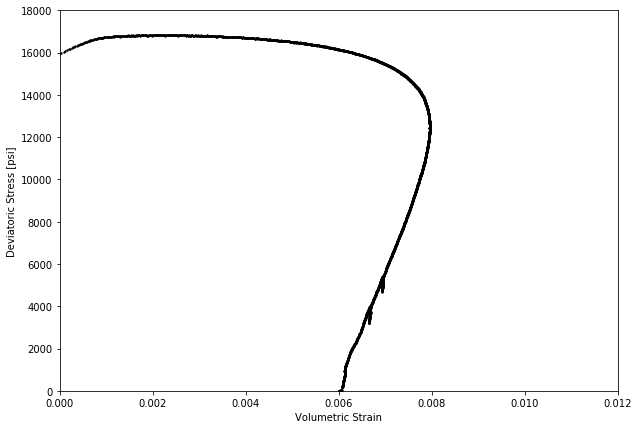

In [16]:
import numpy as np
import matplotlib.pyplot as plt

Time = DataQ2['Time [s]']
SigD = DataQ2['SigD [psi]']
Eaxial = DataQ2['Axial Strain, Ex']
Eradial = DataQ2['Radial Strain, Ey']
Evol = DataQ2['Volumetric Strain, Evol']

# Radial strain vs axial strain
plt.scatter(Evol,SigD,color="k",s=2)
# plot labels
plt.xlabel('Volumetric Strain')
plt.ylabel('Deviatoric Stress [psi]')
# axis range
plt.xlim([0, 0.012])
plt.ylim([0, 18000])

# Change plot size
fig = plt.gcf()
fig.set_size_inches(10, 7)

##### e) If q=5.3, what is the UCS of this rock?

Confining pressure or the effective minimum principal stress ($\sigma_3$) is given to be 1500 [psi]

From part b), we plotted deviatoric stress ($\sigma_d$) as a function of axial strain. The peak stress was ~16800 [psi]

Recall $\sigma_1$ (the effective maximum principal stress) is calculated using

$$\sigma_1=\sigma_3+\sigma_d$$
<br>
$$\sigma_1=1500+16800=18300 [psi]$$

Recall Coulomb's failure criterion can be written as

$$\sigma_1 = UCS + q \; \sigma_3$$
<br>
$$18300 = UCS + 5.3 \times 1500$$
<br>
$$UCS=10350 [psi]$$